# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [2]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 

#### Question 2. Create a summary table

In [4]:
#function
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GRE can take a larger range of values (220 to 800) whereas GPA always falls between 0 and 4.

#### Question 4. Drop data points with missing data


In [5]:
df = df_raw.dropna(how = 'any')
df.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: When I described the dataframe above, all columns now have 397 values.

#### Question 6. Create box plots for GRE and GPA

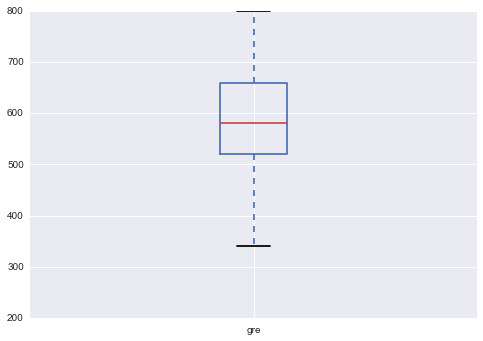

In [6]:
#boxplot 1
import seaborn as sns
df['gre'].plot(kind='box')

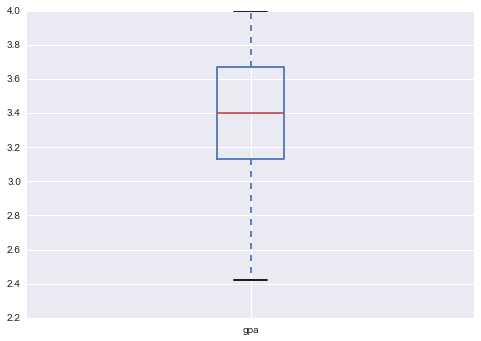

In [7]:
#boxplot 2 
df['gpa'].plot(kind='box')

#### Question 7. What do this plots show?

Answer: GRE scores look pretty normally distributed, but GPAs are skewed slightly negative.

In [17]:
from scipy.stats import normaltest
normaltest(df[['gre', 'gpa']])

(array([  3.81798293,  13.07987556]), array([ 0.14822981,  0.00144458]))

#### Question 8. Describe each distribution 


* The GRE variable has a median and mean of 580, taking values from 220 to 800. The interquartile range is 140. The normal test suggests that we cannot say with confidence that the distribution is normally distributed.
* The GPA variable has a median and mean of 3.4, taking values from 2.3 to 4. The interquartile range is ~0.6. The normal test suggests that it is normally distributed.

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No, because the GRE variable appears to not be normally distributed.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Yes, the GRE variable.

#### Question 11. Which of our variables are potentially colinear? 

In [18]:
# create a correlation matrix for the data
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: The variables with the strongest positive correlation is GRE and GPA. The prestige variable is negatively correlated with admissions rates, and slightly negatively correlated with GRE and GPA.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: Build a logistic regression with prestige and either GRE or GPA as predictors of admission. 

#### Question 14. What is your hypothesis? 

Answer: I hypothesize that an decrease in the prestige variable will be as

In [29]:
import statsmodels.api as sm
cols = df.columns[1:]
logit = sm.Logit(df['admit'], df[cols])


result = logit.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.586294
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            2
Date:                Thu, 02 Feb 2017   Pseudo R-squ.:                 0.06175
Time:                        14:24:41   Log-Likelihood:                -232.76
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 2.225e-07
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
gre            0.0015      0.001      1.404      0.160        -0.001     0.004
gpa           -0.0039      0.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data